In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp "/content/drive/MyDrive/perceptron.csv" .

In [4]:
perceptron = np.genfromtxt('perceptron.csv', delimiter=',')

In [5]:
perceptron = np.delete(perceptron, 0, axis=0)
X = perceptron[:, 0:2]
y = perceptron[:, 2:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

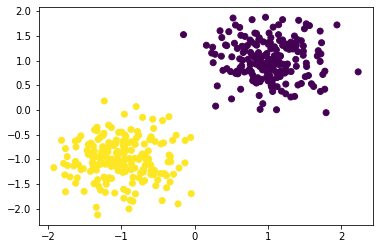

In [6]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Perceptron

In [7]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100, threshold=0.5):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features,1))
        self.bias = 0
        self.threshold = threshold

        for i in range(n_iters):
            a = np.dot(X, self.weights) + self.bias

            y_predict = self.activation(a)

            if not np.array_equal(y, y_predict):
              delta_w = learning_rate * np.dot(X.T, y)
              delta_b = learning_rate * np.sum(y)

              self.weights += delta_w
              self.bias += delta_b

        return self.weights, self.bias

    def activation(self, x):
        return np.array([1 if elem > self.threshold else 0 if abs(elem) <= self.threshold else -1 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.activation(a)

In [8]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, y_train,learning_rate=0.05, n_iters=500)

In [9]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [10]:
def plot_hyperplane(X, y, weights, bias, threshold=0.5):
    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y)

    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '-')
    ###
    # #
    ###
    intercept = - bias/weights[1] + threshold
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '--')
    ###
    # #
    ###
    intercept = - bias/weights[1] - threshold
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '--')

    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

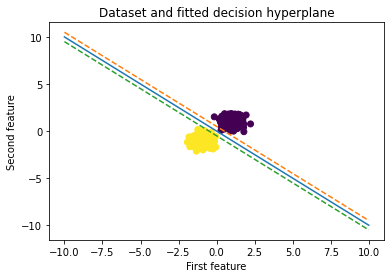

In [11]:
plot_hyperplane(X, y, w_trained, b_trained)

# AdaLine

In [12]:
x1 = np.random.normal(1, 0.5, 1000)
x2 = np.random.normal(1, 0.5, 1000)

In [13]:
x1_2 = np.random.normal(-1, 0.5, 10)
x2_2 = np.random.normal(-1, 0.5, 10)

In [14]:
def Xy(x1, x2, x1_1, x2_2):
  class_1 = np.column_stack((x1, x2))
  class_1 = np.column_stack((class_1, np.full(class_1.shape[0], 1)))

  class_2 = np.column_stack((x1_2, x2_2))
  class_2 = np.column_stack((class_2, np.full((class_2.shape[0], 1), -1)))

  adaline = np.row_stack((class_1, class_2))

  np.random.shuffle(adaline)

  return adaline[:, 0:2], adaline[:, 2:3]

In [15]:
X, y = Xy(x1, x2, x1_2, x2_2)

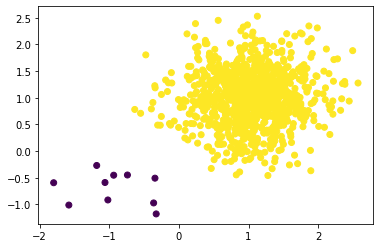

In [16]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [17]:
class AdaLine():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            a = np.dot(X, self.weights) + self.bias

            y_predict = self.activation(a)

            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def activation(self, x):
        return np.array([1 if elem >= 0 else -1 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.activation(a)

In [18]:
p = AdaLine()
w_trained, b_trained = p.train(X, y, learning_rate=0.05, n_iters=500)

In [19]:
y_p_train = p.predict(X)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y)) * 100}%")

training accuracy: 100.0%


In [20]:
def plot_hyperplane(X, y, weights, bias):
    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y)

    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '-')

    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

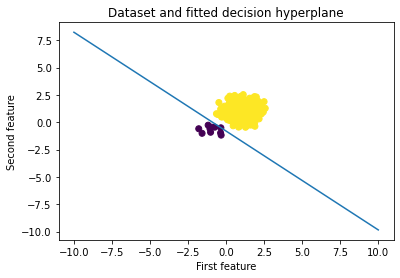

In [21]:
plot_hyperplane(X, y, w_trained, b_trained)

In [22]:
X, y = Xy(x1, x2, x1_2, x2_2)

In [23]:
x1 = np.random.normal(1, 0.5, 100)
x2 = np.random.normal(1, 0.5, 100)

In [24]:
x1_2 = np.random.normal(-1, 0.5, 100)
x2_2 = np.random.normal(-1, 0.5, 100)

In [25]:
X, y = Xy(x1, x2, x1_2, x2_2)

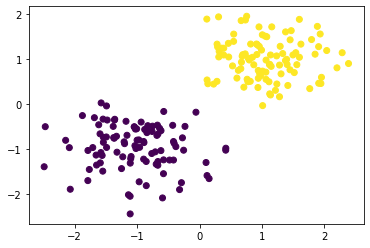

In [26]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [27]:
p = AdaLine()
w_trained, b_trained = p.train(X, y, learning_rate=0.05, n_iters=500)

In [28]:
y_p_train = p.predict(X)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y)) * 100}%")

training accuracy: 100.0%


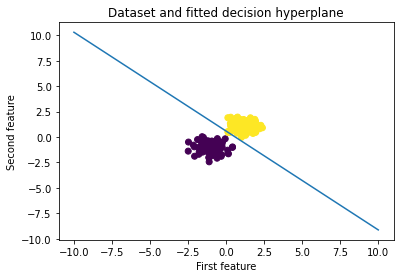

In [29]:
plot_hyperplane(X, y, w_trained, b_trained)

# Madaline

In [30]:
!cp "/content/drive/MyDrive/madaline.csv" .

In [31]:
madaline = np.genfromtxt('madaline.csv', delimiter=',')

In [32]:
x1 = madaline[madaline[:, 2] == 1][:, 0]
x2 = madaline[madaline[:, 2] == 1][:, 1]

In [33]:
x1_2 = madaline[madaline[:, 2] == 0][:, 0]
x2_2 = madaline[madaline[:, 2] == 0][:, 1]

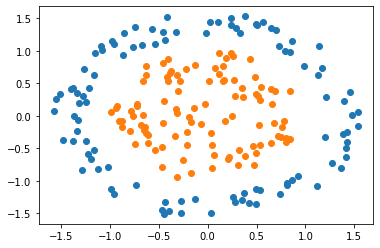

In [34]:
plt.scatter(x1, x2) 
plt.scatter(x1_2, x2_2) 

plt.show()

In [35]:
class Neuron:
  def __init__(self, weights, bias, epoch, activation_function, learning_rate):
    self.weights = weights
    self.bias = bias
    self.epoch = epoch
    self.activation_function = activation_function
    self.learning_rate = learning_rate
    self.counter = 0
  
  def calculate_net_value(self, inputs):
    return np.dot(inputs, self.weights) + self.bias

  def calculate_h_value(self, inputs):
    return(self.activation_function(self.calculate_net_value(inputs)))

  def update(self, target, inputs):
    self.bias = self.bias + self.learning_rate * (target - self.calculate_net_value(inputs))
    self.weights = self.weights +  np.dot(self.learning_rate * int(target - self.calculate_net_value(inputs)) , inputs)
    self.counter += 1

  def check_end_condition(self):
    if self.counter >= self.epoch:
      return True
    else:
      return False

  def get_weights(self):
    return self.weights

  def get_bias(self):
    return self.bias

  def set_weight(self, w):
    self.weights = w

  def set_bias(self, b):
    self.bias = b

In [36]:
def activation_function(x):
  if x >= 0:
    return 1
  else:
    return 0

def and_operator(a, b):
  if a == 1 and b == 1:
    return 1
  elif a == 1 and b == 0:
    return 0
  elif a == 0 and b == 1:
    return 0
  elif a == 0 and b == 0:
    return 1

In [37]:
def make_line(weight, bias, x1, x2):
  a_out1 = (x1 * weight[0] + bias) / weight[1]
  a_out2 = (x2 * weight[0] + bias) / weight[1]

  return [x1, x2] , [a_out1, a_out2]

In [38]:
import random

class Network:
  def __init__(self, inputs, neuron_number):
    self.neuron_number = neuron_number
    self.inputs = inputs
    self.neurons = []

  def plot_hyperplanes(self, x1, x2):
    fig = plt.figure()
    plt.scatter(x1, x2)

    for neuron in self.neurons:
      x_hyperplane, y_hyperplane = make_line(neuron.weights, neuron.bias, x1, x2)
      plt.plot(x_hyperplane, y_hyperplane, '-')

      # slope = - neuron.weights[0]/neuron.weights[1]
      # intercept = - neuron.bias/neuron.weights[1]
      # x_hyperplane = np.linspace(-10,10,10)
      # y_hyperplane = slope * x_hyperplane + intercept
      # plt.plot(x_hyperplane, y_hyperplane, '-')

    plt.show()

  def make_neurons(self):
    for i in range(self.neuron_number):
      w = np.random.normal(1, 3, 2)
      b = 1

      self.neurons.append(Neuron(w, b, 200, activation_function, 0.0001))

  def train(self, limit, class_number):
    self.make_neurons()
    
    if class_number == 2:
      n = random.randint(2, self.neuron_number - 1)
      self.neurons[n].set_weight([-1, 2.8])
      self.neurons[n].set_bias(13)
    if class_number == 1:
      n = random.randint(3, self.neuron_number - 1)
      self.neurons[n].set_weight([-1.5, 1])
      self.neurons[n].set_bias(5)

    h = [j for j in range(len(self.inputs))]
    index_list = random.shuffle(h)
    for i in h:
      hidden_out = []
      for j in range(len(self.neurons)):
        hidden_out.append(self.neurons[j].calculate_h_value(inputs[i]))
      and_result = 1
      for l in range(len(hidden_out)):
        and_result = and_operator(and_result, hidden_out[l])
      
      if (i < limit and class_number == 1) or (i >= limit and class_number == 2):
        target = 1
      elif (i < limit and class_number == 2) or (i >= limit and class_number == 1):
        target = 0

      if and_result == 1 and target == 0:
        net_values = []
        for j in range(len(self.neurons)):
          net_values.append(self.neurons[j].calculate_net_value(inputs[i]))
        min_net_value = 99999
        index = 0
        for k in range(len(net_values)):
          if net_values[k] < min_net_value:
            min_net_value = net_values[k]
            index = k
        self.neurons[index].update(target, self.inputs[i])
        
      elif and_result == 0 and target == 1:
        for j in range(len(self.neurons)):
          if hidden_out[j] == 0:
            self.neurons[j].update(target, self.inputs[i])
      
    weights = []
    bias = []
    for i in range(len(self.neurons)):
      weights.append(self.neurons[i].get_weights())  
      bias.append(self.neurons[i].get_bias())

    return weights, bias

  def test(self, limit, data, class_number):
        total = 0
        error = 0

        for i in range(len(self.inputs)):
            hidden_out = []
            for j in range(len(self.neurons)):
                hidden_out.append(self.neurons[j].calculate_h_value(inputs[i]))
            and_result = 1
            for k in range(len(hidden_out)):
                and_result = and_operator(and_result, hidden_out[k])
            total += 1
            
            if class_number == 1:
                if i < limit:
                  if and_result == 0:
                    error += 1
                else:
                  if and_result == 1:
                    error += 1

            if class_number == 2:
                if i >= limit:
                  if and_result == 0:
                    error += 1
                else:
                  if and_result == 1:
                    error += 1

        print(error / total)

In [39]:
inputs = []
for i in range(x1.shape[0]):
  inputs.append([x1[i], x2[i]])

for i in range(x1_2.shape[0]):
  inputs.append([x1_2[i], x2_2[i]])

In [40]:
first_network = Network(inputs, 10)
second_network = Network(inputs, 10)

first_weights, first_bias = first_network.train(x1.shape[0], 1)
second_weights, second_bias = second_network.train(x1.shape[0], 2)

first_network.test(x1.shape[0], inputs, 1)
second_network.test(x1.shape[0], inputs, 2)

0.545
0.425
